Anonymous Code: [P243] 
    
APPENDIX I : MST 003 ASSEMBLING AND MANAGING INNOVATIVE TEAMS ASSESSMENT PAPER

What are the major pitfalls in assembling and managing an innovative team in the context of a high potential venture, what would you do to avoid them or at least limit their potential negative impact, when and why? Be careful to substantiate your argument thoroughly by referring to relevant literature. Position your discussion within a specific entrepreneurial context and preferably one in which you have been involved or are currently pursuing. 



Judge Business School  

University of Cambridge 

Trumpington Road 

Cambridge  

UK 


In [1]:
#########-------METHOD NUMBER ONE - BULDING MULTIPLE MODELS USING DIFFERENT ALGORITHMS----------##########

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing


dataset = pd.read_csv('failory_100i.csv')


le = preprocessing.LabelEncoder()            
dataset = dataset.apply(le.fit_transform)       


print (dataset)

    index_i  Name  Category  Location  Year_of_Creation  Year_of_Failure  \
0         0    28         8         6                16                0   
1        71    20         4        14                14               71   
2        70    57         0        15                15               70   
3        69    64         5        15                12               69   
4        68    25         7        15                12               68   
..      ...   ...       ...       ...               ...              ...   
95       28    35        11         6                15               28   
96       27    73        10        15                16               27   
97       26    17        11        15                13               26   
98       86    68         8        15                15               86   
99       99     6        12        15                 1               99   

    Number_of_Founders  Number_of_Employees  Number_of_Investors  \
0                  

In [3]:
import pandas
import sklearn
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

array = dataset.values

#Split the data into X and Y columns
    
X = array[:,0:23] # X axis data columns from first to the 23rd  column

Y = array[:,-1]   #Y axis data column, the last column


# prepare configuration for cross validation test harness
#Set the seed value
seed = 7

# prepare the different algorithms that will be used to build different models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('XT', ExtraTreesClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('ST', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [4]:
results = []
names = []
scoring = 'accuracy'

for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.620000 (0.166132)
LR: 0.610000 (0.186815)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

XT: 0.600000 (0.184391)
LDA: 0.620000 (0.193907)
SGD: 0.610000 (0.216564)
KNN: 0.630000 (0.179165)
ST: 0.490000 (0.113578)
NB: 0.560000 (0.168523)
SVM: 0.720000 (0.208806)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

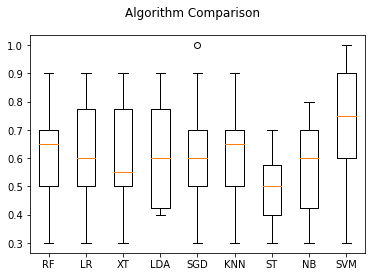

In [5]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [6]:
# As can be seen above the average accuracy for:
#
# Random Forest = 62%
# Logistic Regression = 61%
# ExtraTrees Classifier = 60%
# Linear Discriminant Analysis = 62%
# Stochastic Gradient Descent Classifier = 61%
# K Nearest Neighbors Classifier =63%
# Decision Tree Classifier = 49%
# Gaussian Naive Bayes = 56%
# Support Vector Machine = 72%


# These are clearly not the greatest models for helping us with predicting failures of startups. So better 
# algorithms are needed for better performance.

In [7]:
##########--------------------------------END OF METHOD NUMBER 1----------------------------#################

In [8]:
#########-----------------------------------METHOD NUMBER TWO-------------------------------#################

In [9]:
# Boosting algorithms are known to be better at achieving higher performances.
# For this case I will use Xtreme Gradient Boosting algorithm commonly referred to as XGBoost

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

dataset = pd.read_csv('failory_100i.csv')   

In [11]:
dataset.columns      

Index(['index_i', 'Name', 'Category', 'Location', 'Year_of_Creation',
       'Year_of_Failure', 'Number_of_Founders', 'Number_of_Employees',
       'Number_of_Investors', 'Number_of_Funding_Rounds',
       'Total_Funding_Amount', 'Specific_Cause_of_Failure', 'Outcome',
       'blank_1', 'Number_of_Employees_unified',
       'UNIT_K_is_1-M_is_2-No_Data_is_3-Dash_is_4',
       'Currency_$_is_1_GBP_is_2_Euro_is_3_SEK_is_4', 'Decimal_point_position',
       'len', 'strip_currency', 'strip_units', 'Correct_figure_amount',
       'Correct_amount_in_USD',
       'Purchasing Power Parity_Factored_Funding_Amount',
       'Outcome_sunk_0_treading_water_1'],
      dtype='object')

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing


dataset = pd.read_csv('failory_100i.csv') 


le = preprocessing.LabelEncoder()
dataset = dataset.apply(le.fit_transform)


print (dataset)


    index_i  Name  Category  Location  Year_of_Creation  Year_of_Failure  \
0         0    28         8         6                16                0   
1        71    20         4        14                14               71   
2        70    57         0        15                15               70   
3        69    64         5        15                12               69   
4        68    25         7        15                12               68   
..      ...   ...       ...       ...               ...              ...   
95       28    35        11         6                15               28   
96       27    73        10        15                16               27   
97       26    17        11        15                13               26   
98       86    68         8        15                15               86   
99       99     6        12        15                 1               99   

    Number_of_Founders  Number_of_Employees  Number_of_Investors  \
0                  

Accuracy: 100.00%
[0.08427302 0.06147466 0.04877925 0.0624054  0.08453409 0.
 0.04384633 0.07981653 0.06109693 0.06549577 0.05848463 0.04559724
 0.         0.         0.03627019 0.         0.         0.04986937
 0.08616403 0.         0.         0.08247014 0.04942243]


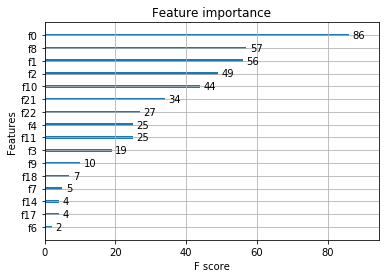

In [13]:
from xgboost import plot_importance
from matplotlib import pyplot

X = dataset.iloc[:,0:23].values
Y = dataset.iloc[:,-1].values   

seed = 72         
test_size = 0.1   

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(model.feature_importances_)


plot_importance(model)
pyplot.show()

In [14]:
# The accuracy of this model above is 100% as can be seen above

In [15]:
# The feature importance information above would be clearer if we show which importance number corresponds to 
# to which feature. The larger the number the more important the feature is in building this model's prediction 
# capability

In [16]:
print('Feature Importances For Our XGBOOST Model Above\n')
for importance,feature in zip(model.feature_importances_,['index_i', 'Name', 'Category', 'Location', 'Year_of_Creation',
       'Year_of_Failure', 'Number_of_Founders', 'Number_of_Employees',
       'Number_of_Investors', 'Number_of_Funding_Rounds',
       'Total_Funding_Amount', 'Specific_Cause_of_Failure', 'Outcome',
       'blank_1', 'Number_of_Employees_unified',
       'UNIT_K_is_1-M_is_2-No_Data_is_3-Dash_is_4',
       'Currency_$_is_1_GBP_is_2_Euro_is_3_SEK_is_4', 'Decimal_point_position',
       'len', 'strip_currency', 'strip_units', 'Correct_figure_amount',
       'Correct_amount_in_USD',
       'Purchasing Power Parity_Factored_Funding_Amount' ]):
    print('{}: {}'.format(feature,importance))
    
    

Feature Importances For Our XGBOOST Model Above

index_i: 0.08427301794290543
Name: 0.06147465854883194
Category: 0.04877925291657448
Location: 0.06240539997816086
Year_of_Creation: 0.08453408628702164
Year_of_Failure: 0.0
Number_of_Founders: 0.04384633153676987
Number_of_Employees: 0.07981652766466141
Number_of_Investors: 0.061096932739019394
Number_of_Funding_Rounds: 0.06549576669931412
Total_Funding_Amount: 0.058484628796577454
Specific_Cause_of_Failure: 0.045597244054079056
Outcome: 0.0
blank_1: 0.0
Number_of_Employees_unified: 0.03627018630504608
UNIT_K_is_1-M_is_2-No_Data_is_3-Dash_is_4: 0.0
Currency_$_is_1_GBP_is_2_Euro_is_3_SEK_is_4: 0.0
Decimal_point_position: 0.04986937344074249
len: 0.08616402745246887
strip_currency: 0.0
strip_units: 0.0
Correct_figure_amount: 0.08247014135122299
Correct_amount_in_USD: 0.049422431737184525


In [17]:
# Important Factors that seem to be critical in this model that founders can manage appear to be:


# The total amount of funding the venture received
# The location where the company is based is also of importance
# The timing of launch as in year the company was formed is also important



In [18]:
# QUESTION THEN BECOMES WHAT COULD INCREASE THE CHANCES OF A COMPANY TO SUCCEED FROM THIS LIST OF 
# CONTROLLABLE FACTORS? THIS QUESTION AS WELL AS OTHER DIRECTLY AND INDIRECTLY RELATED TO IT ARE GOING TO BE THE 
# BULK OF MY FUTURE WORK, AS WELL AS FINE TUNING SOME OF THESE FACTORS TO SEE WHICH ONES WHEN PUT IN WHAT COMBINATIONS 
# WOULD HELP FOUNDERS AVOID SOME OF THE MAJOR PITFALLS THUS REDUCE THE CHANCES OF FAILURE IN THE CONTEXT OF HIGH 
# POTENTIAL VENTURES. OR IN OTHER WORDS - INCREASE THE HIGH POTENTIAL VENTURE'S CHANCES OF SUCCESS